# Preprocesamiento de texto 

Cuando se trabaja con documentos, existe un importante porcentaje de palabras que no aporta ningún tipo de valor. Por ello, es necesario realizar un pre-procesado de los textos antes de poder aplicar un determinado algoritmo, de modo que se adapten al tipo de entrada esperado en cada caso.

Un gran número de atributos (palabras, en este caso) puede conllevar el consumo excesivo de tiempo y recursos, mientras que un número bajo puede afectar a la clasificación de los documentos por una pérdida de información. Por ello, es crucial la forma en que se representan los datos con los que se va a trabajar, para así hacer un uso responsable del tiempo y recursos que se necesitan.

El objetivo de esta fase de preprocesado es limpiar y normalizar los datos que serán utilizados posteriormente, para evitar la influencia negativa que pueden generar ciertos datos. 

Para poder alcanzar este objetivo y además, **poder representar el texto de entrada como un vector**, suelen emplearse técnicas standard de preprocesamiento:



*   El primer paso llevado a cabo, esencial para poder realizar un procesado textual de forma estructurada, es el que recibe el nombre en inglés de ***tokenization***. Se basa en la división del texto en palabras, formando una lista de los elementos que le dan forma al texto. En el ejemplo de código que se encuentra a continuación, este proceso se lleva a cabo mediante el uso de la librería *nltk* (*word_tokenize*), que transforma un texto a un array de palabras basándose en los delimitadores habituales (espacios, comas...).
*   Otro de los pasos en el preprocesado es la eliminación de una serie de palabras que se consideran sin significado. Las palabras a eliminar se agrupan en listas denominadas ***stopwords***. Palabras como artículos, pronombres, preposiciones e incluso algunos verbos, no contienen ningún tipo de significado por si solas, ya que solamente modifican o acompañan a otras. Estos términos pueden ser ignorados sin sacrificar el significado de la oración por la carencia de información. Obviamente, esta lista es completamente dependiente del idioma con el que se trabaja. En el ejemplo, se emplea un conjunto de stopwords extraídos de la propia librería *nltk*
*   Como paso posterior, y con el objetivo de eliminar variaciones de palabras provocadas por la conjugación, o utilización de plurales, femeninos o masculinos se procede a realizar una lematización de cada palabra, obteniendo como resultado la raíz común. Existen múltiples grados de lematización, según se realice únicamente un análisis morfológico de la palabra o si además se analiza sintácticamente la frase para conocer su verdadero significado. De forma muy parecida a la lematización, se habla de ***stemmization***, el método por el cual se puede obtener la raíz de cada palabra sin que el resultado sea una palabra real. Esto quiere decir, que mientras la lematización busca la raíz real, este método elimina de la palabra analizada los caracteres problemáticos, obteniendo como resultado la parte de la palabra que hace referencia a la raíz.
Este proceso también es dependiente del idioma y en el ejemplo se emplea un algoritmo de stemmization de Porter (*PorterStemmer*, de la libería *nltk*). 

## Ejemplo de preprocesado con sinopsis de películas

El dataset con el que se trabaja contiene una colección de 9991 películas. Cada una de ellas tiene un campo 'overview', que contiene una descripción textual de su sinopsis.

En la siguiente celda de código se transforman los textos contenidos en el campo 'overview' a textos preprocesados siguiendo los anteriormente mencionados pasos. Estes nuevos textos tokenizados se almacena en una nueva columna a la que llamamos 'preprocessed_text'








In [ ]:
import pandas as pd

originalData = pd.read_csv('movies_overview.csv')
originalData

,title,overview,popularity
0,Minions,"Minions Stuart, Kevin and Bob are recruited by...",547.488298
1,Wonder Woman,An Amazon princess comes to the world of Man t...,294.337037
2,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654
3,Baby Driver,After being coerced into working for a crime b...,228.032744
4,Big Hero 6,The special bond that develops between plus-si...,213.849907
...,...,...,...
9986,Marquis de Sade: Justine,A woman named Justine is (willingly) used and ...,4.475666
9987,Killshot,Beautiful Carmen Colson and her ironworker hus...,4.475472
9988,Dirty Dancing: Havana Nights,"In pre-revolution Cuba, Katey Miller is about ...",4.475359
9989,Palmetto,A recently released ex-con gets involved in a ...,4.475177


In [ ]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

import nltk
nltk.download('punkt')
nltk.download('stopwords')

ps = PorterStemmer()

preprocessedText = []

for row in originalData.itertuples():
    
    
    text = word_tokenize(row[2]) ## indice de la columna que contiene el texto
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [ps.stem(w) for w in text if not w in stops and w.isalnum()]
    text = " ".join(text)
    
    preprocessedText.append(text)

preprocessedData = originalData
preprocessedData['processed_text'] = preprocessedText

preprocessedData
    


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,overview,popularity,processed_text
0,Minions,"Minions Stuart, Kevin and Bob are recruited by...",547.488298,minion stuart kevin bob recruit scarlet overki...
1,Wonder Woman,An Amazon princess comes to the world of Man t...,294.337037,An amazon princess come world man becom greate...
2,Beauty and the Beast,A live-action adaptation of Disney's version o...,287.253654,A adapt disney version classic beast tale curs...
3,Baby Driver,After being coerced into working for a crime b...,228.032744,after coerc work crime boss young getaway driv...
4,Big Hero 6,The special bond that develops between plus-si...,213.849907,the special bond develop inflat robot baymax p...
...,...,...,...,...
9986,Marquis de Sade: Justine,A woman named Justine is (willingly) used and ...,4.475666,A woman name justin willingli use abus manner ...
9987,Killshot,Beautiful Carmen Colson and her ironworker hus...,4.475472,beauti carmen colson ironwork husband wayn pla...
9988,Dirty Dancing: Havana Nights,"In pre-revolution Cuba, Katey Miller is about ...",4.475359,In cuba katey miller defi everyon expect inste...
9989,Palmetto,A recently released ex-con gets involved in a ...,4.475177,A recent releas get involv fake kidnap scheme ...


In [ ]:
preprocessedData.iloc[0]['overview']

'Minions Stuart, Kevin and Bob are recruited by Scarlet Overkill, a super-villain who, alongside her inventor husband Herb, hatches a plot to take over the world.'

In [ ]:
preprocessedData.iloc[0]['processed_text']

'minion stuart kevin bob recruit scarlet overkil alongsid inventor husband herb hatch plot take world'

# Representación del texto como un vector: Bag of words

El procesamiento automático de textos requiere adaptar la presentación textual de un documento a un formato de entrada válido para distintos algoritmos. La forma más utilizada de representación recibe el nombre de “**bag-of-words**”,  un tipo de representación donde cada documento se transforma en un vector de tamaño igual al número de palabras representativas (términos) que lo constituyen. Cada elemento del vector indica el número de repeticiones de un término en el documento.

Para esta representación se procesan los distintos documentos del dataset. Para cada uno se forma una lista con las palabras que lo integran sin que estas se repitan. El conjunto de estas listas formarán el vocabulario del dataset, universo en el cual se trabaja para realizar el posterior procesado. 

El siguiente paso es generar un vector con todas las palabras de los documentos. Este vector, al juntar las palabras que forman cada uno de los documentos utilizados, tiene un tamaño igual al número de palabras sin repetición. Imaginémonos un escenario con un dataset de 2 instancias / documentos / textos (Texto "A" y Texto "B") como el presentado en la imagen. Para este ejemplo, se obtiene un vector de 11 x 2, siendo 11 el número de palabras y 2 el número de documentos.

Cada uno de los elementos del vector simboliza el número de veces que la palabra aparece en el documento, obteniendo de esta forma su frecuencia en un tipo de representación numérica más sencilla de procesar. A simple vista se puede observar cómo este proceso puede resultar problemático, ya que cada nueva palabra debe ser añadida al vector. 

La aparición de palabras vacías como pronombres o determinantes, el no tratamiento de variantes de una misma palabra y la pérdida de su orden de aparición original provoca un aumento no deseado del tamaño de estas listas. Por ello, es necesario que además de contar con un modelo de representación, como el explicado, se haga un preprocesado del texto como el comentado en la sección anterior.

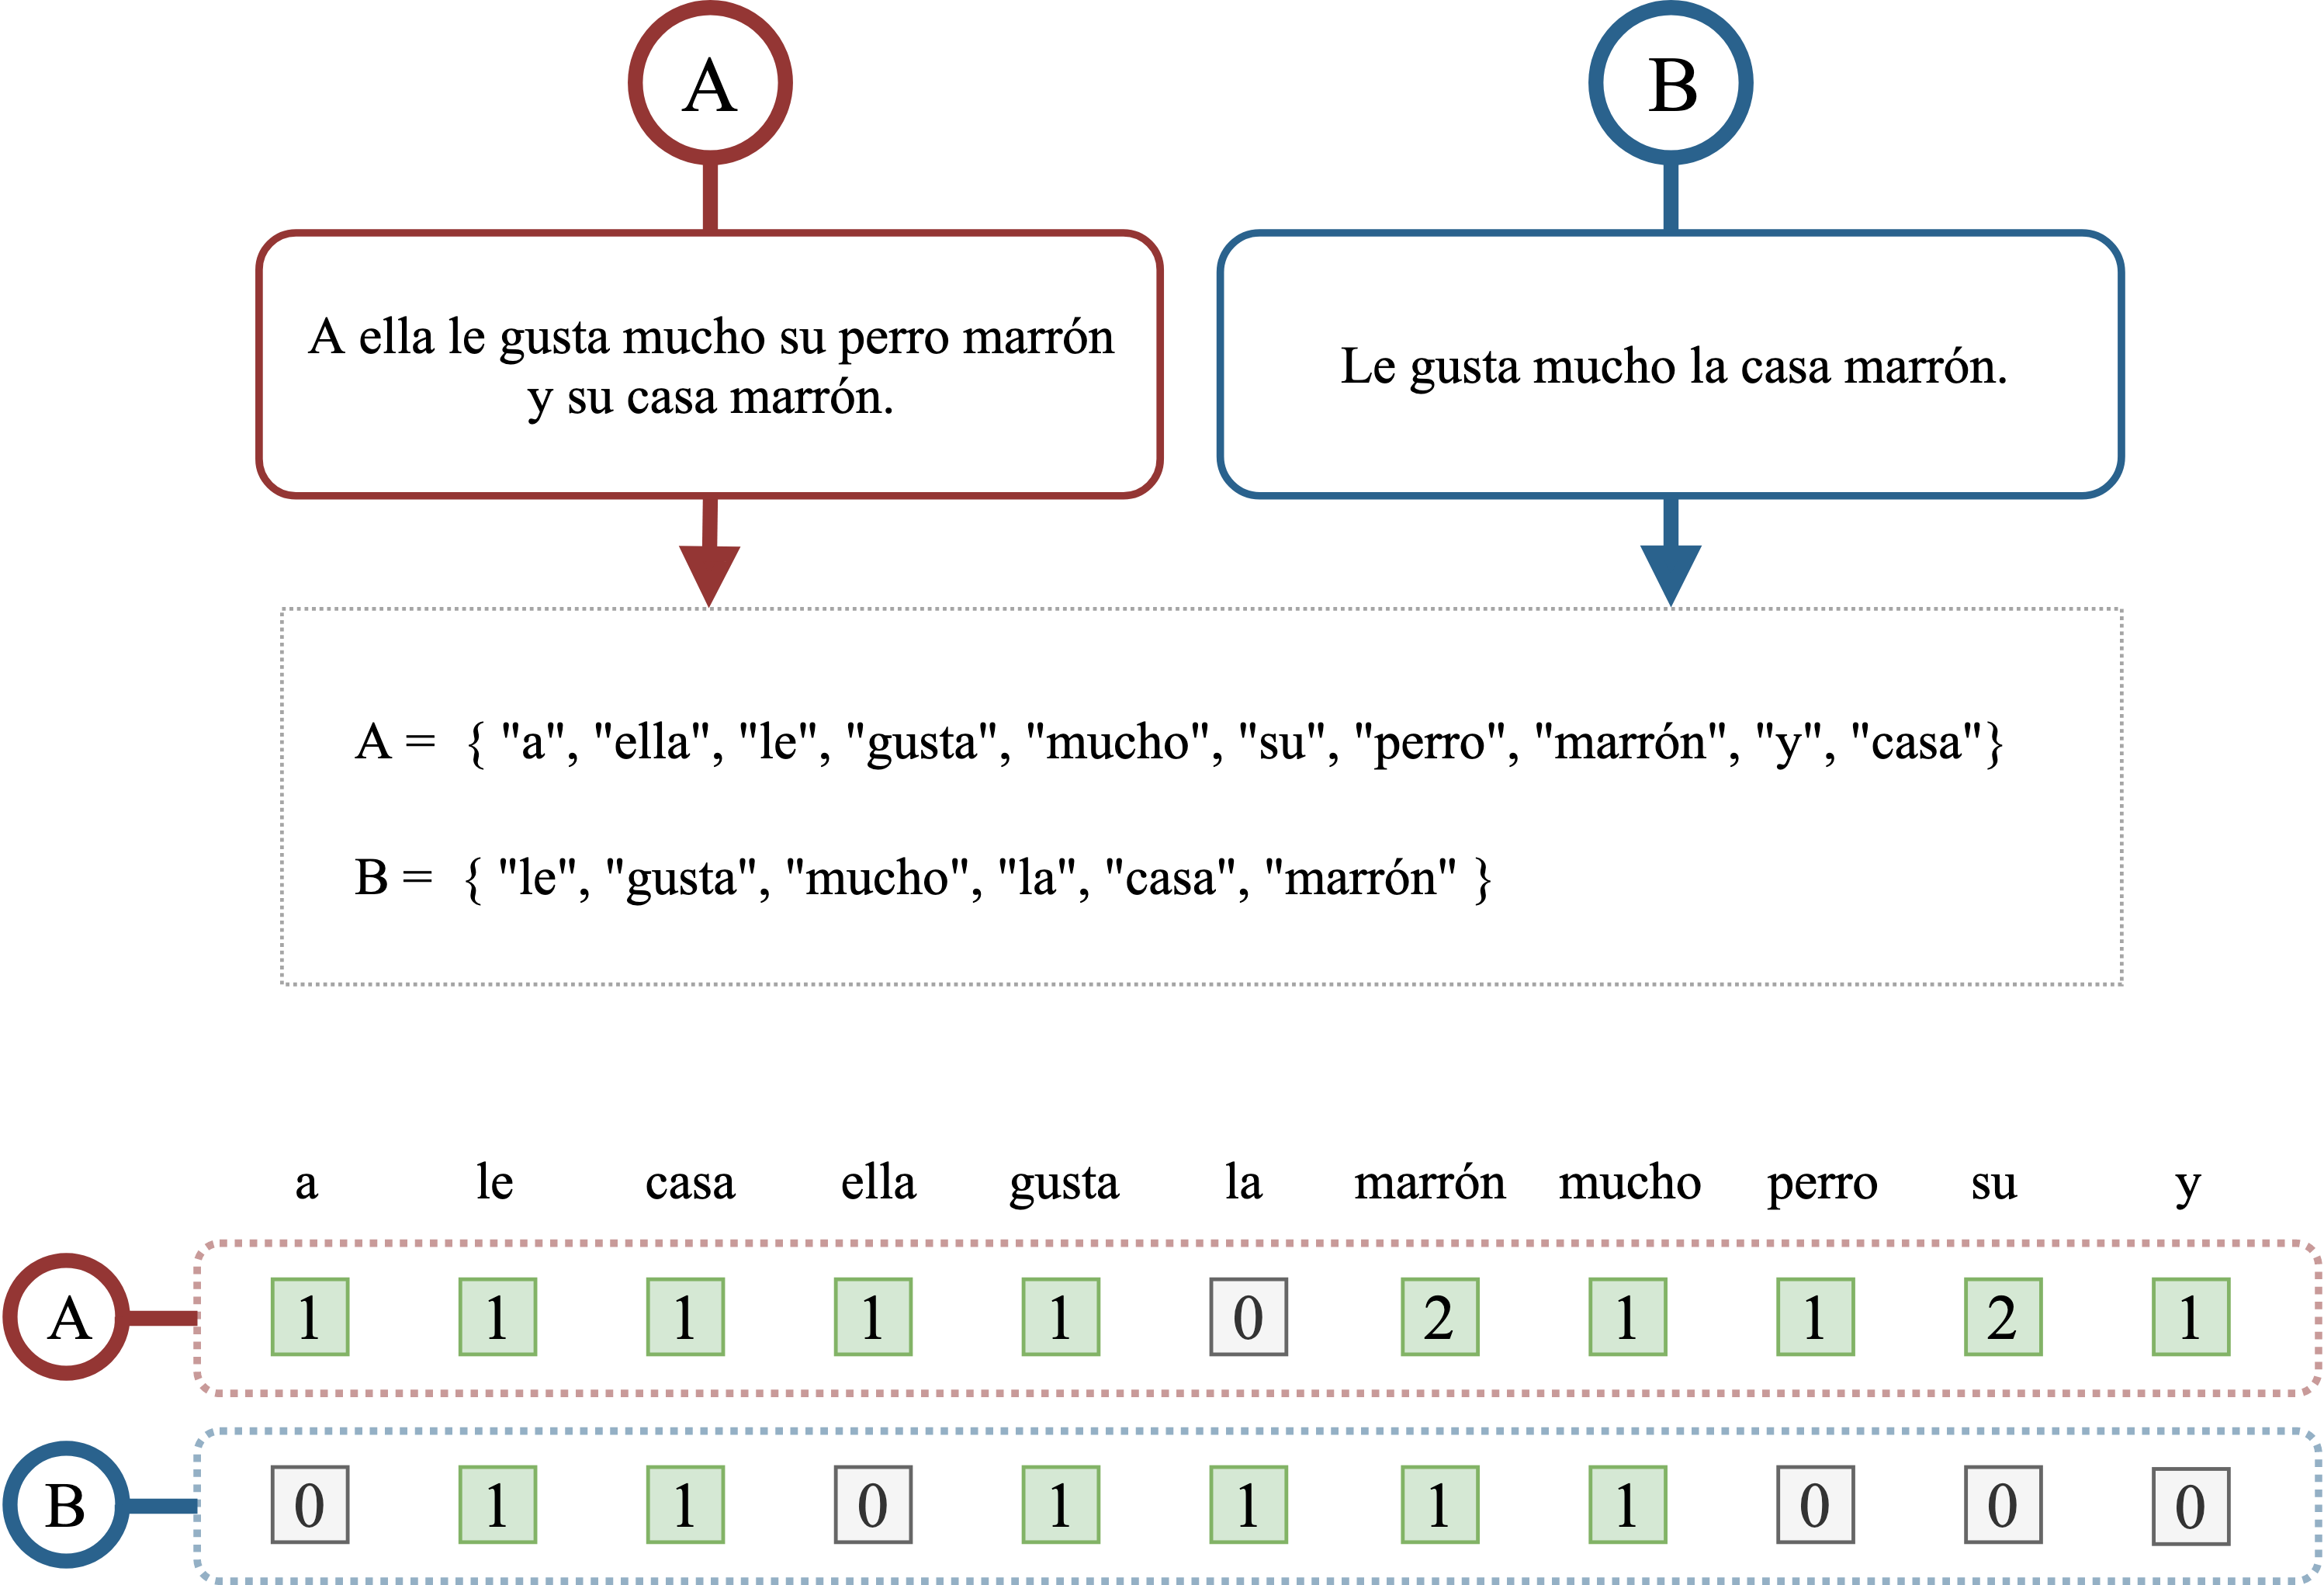



## TF-IDF

A la hora de considerar la frecuencia de las palabras debe tenerse en cuenta que puede que las palabras que más se repiten sean las que contengan menos información para el modelo, ante palabras más “raras” de dominio específico. 

TF-IDF son las siglas en inglés de la frecuencia de un término – inversa de la frecuencia del documento (term frecuency – inverse document frecuency), una forma de medir estadísticamente la importancia que tiene cierta palabra en un texto. En este caso, se tiene en cuenta el número de veces que un término aparece en un único documento y el número de veces que aparece en todos los documentos de la colección.

TF-IDF es una medida numérica que expresa cuán relevante es una palabra para un documento en una colección, midiendo con qué frecuencia aparece un término o frase dentro de un documento determinado y comparándolo con el número de documentos que mencionan dicho término dentro de una colección entera. “Relevancia no es repetir una palabra sin ton ni son” (referencia 5). 

TF-IDF cambia la escala de la frecuencia de las palabras según la frecuencia con la que aparecen en el corpus, de modo que penalicen las puntuaciones de palabras frecuentes tanto en documentos como en la colección; es decir, las veces que aparece una palabra en un documento es compensada por la frecuencia de la palabra en la colección de documentos.

Para calcular este valor, se tiene que hablar primero de dos conceptos, frecuencia del término (term frequency, tf) y frecuencia inversa del documento (inverse document frequency, idf). El primero es la frecuencia asociada a la aparición de una palabra en el documento actual, mientras que el segundo concepto es una puntuación de cuán rara es la palabra en los documentos; es decir, mide la ocurrencia del término en la colección de documentos.

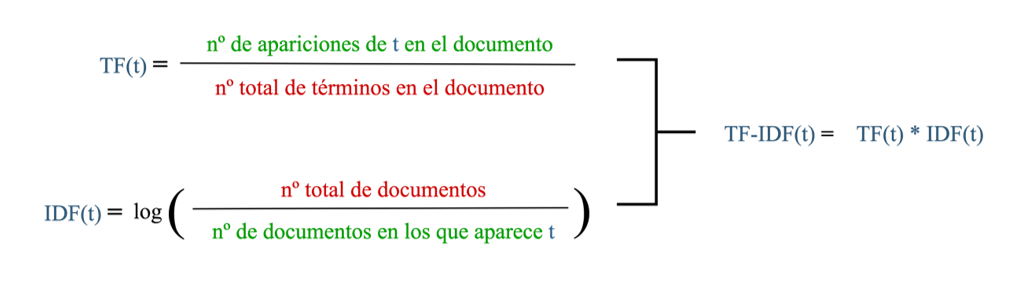

A modo de ejemplo, en un texto de 300 palabras sacado de un grupo de 20.000 documentos, donde la palabra diabetes se repite 15 veces, se obtendría un valor TF de 0.05. Si se cuenta con que dicho término aparezca en 500 de los 20.000 documentos totales, se obtiene un IDF de 1.6. De este modo, el valor final de TF-IDF, y por lo tanto la importancia de la palabra diabetes dentro del conjunto de documentos, sería de 0.08.

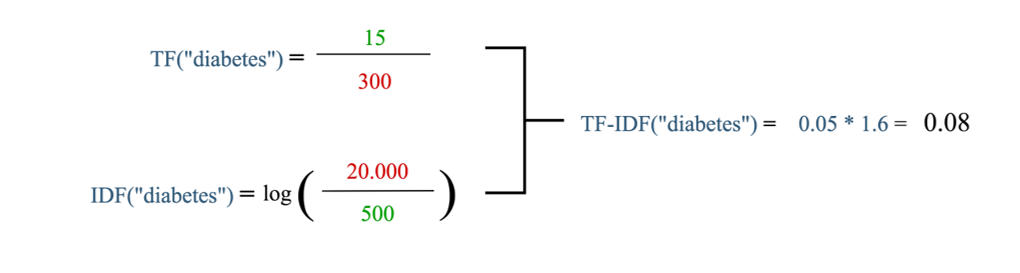

En conclusión, un alto peso se alcanza con una elevada frecuencia de término en un documento y su aparición en pocos documentos de la colección.





#Ejemplo de creación de la bolsa de palabras (BoW) con TF-IDF

Se parte de los datos almacenados en "preprocessedData", en donde para cada película existe un campo 'preprocessed_text' que contiene la sinopsis preprocesada.

El objetivo es transformar todos los textos de sinopsis en vectores de frecuencias (Bag of words), aplicando además la ponderación TF-IDF para los valores de dichas frecuencias.

El paquete sklearn ofrece una clase llamada *TfidfVectorizer* que crea automáticamente la matriz compuesta por todos los vectores de frecuencias ponderados a partir de un array de textos (preprocessedData['processed_text'])

Si se quiere emplear la bolsa de palabras sin ponderación TF-IDF puede usarse la clase *CountVectorized* del mismo paquete

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

bagOfWordsModel = TfidfVectorizer()
bagOfWordsModel.fit(preprocessedData['processed_text'])
textsBoW= bagOfWordsModel.transform(preprocessedData['processed_text'])
print("Finished")

Finished


In [ ]:
textsBoW.shape


(9991, 21414)

In [ ]:
print(textsBoW)

  (0, 21064)	0.12287624124879062
  (0, 18748)	0.12220146837224946
  (0, 18323)	0.3076392682270086
  (0, 16700)	0.3254239940067904
  (0, 15625)	0.2173364471142807
  (0, 14676)	0.19024804300006623
  (0, 13921)	0.3600960228740767
  (0, 12538)	0.29229665103797603
  (0, 10447)	0.2528885051778382
  (0, 9738)	0.26303949368368007
  (0, 9208)	0.17283717608261323
  (0, 8765)	0.3254239940067904
  (0, 8579)	0.24968889167454023
  (0, 2425)	0.25518251357994043
  (0, 856)	0.2729672393597223
  (1, 21064)	0.19993627410436404
  (1, 18473)	0.41717125454099696
  (1, 14993)	0.3565337628031971
  (1, 11797)	0.20378565678116944
  (1, 8144)	0.3611536843593994
  (1, 6883)	0.3482195695273931
  (1, 4082)	0.23144617548558463
  (1, 1981)	0.20561242197169569
  (1, 967)	0.2583372272407131
  (1, 907)	0.4506416949540005
  :	:
  (9990, 11199)	0.12522567976844098
  (9990, 9627)	0.14946567281681666
  (9990, 9492)	0.12389072114714665
  (9990, 9208)	0.08838016008466026
  (9990, 8143)	0.13863754079946602
  (9990, 7760)	0.335

In [ ]:
bagOfWordsModel.get_feature_names()

['00',
 '000',
 '007',
 '10',
 '100',
 '1000',
 '100th',
 '101',
 '103',
 '108',
 '10b',
 '10mn',
 '10th',
 '11',
 '1138',
 '117',
 '118',
 '1183',
 '119',
 '11th',
 '12',
 '120',
 '1200',
 '1206',
 '1215',
 '1250',
 '12th',
 '13',
 '130',
 '1300',
 '133',
 '1344',
 '13th',
 '14',
 '140',
 '1408',
 '142',
 '1429',
 '1492',
 '14th',
 '15',
 '150',
 '150000',
 '150th',
 '1536',
 '155',
 '1557',
 '1561',
 '1597',
 '15th',
 '15yr',
 '16',
 '160',
 '1600',
 '161',
 '1630',
 '164',
 '1649',
 '1681',
 '1691',
 '1692',
 '16th',
 '17',
 '1700',
 '1740',
 '1748',
 '1760',
 '1787',
 '17th',
 '18',
 '180',
 '1800',
 '1804',
 '1808',
 '1812',
 '1815',
 '1817',
 '1818',
 '1820',
 '1825',
 '1830',
 '1831',
 '1836',
 '1840',
 '1845',
 '1850',
 '1856',
 '1857',
 '1860',
 '1863',
 '1865',
 '1870',
 '1871',
 '1874',
 '1875',
 '1879',
 '1880',
 '1885',
 '1889',
 '1890',
 '1892',
 '1893',
 '1897',
 '1898',
 '18th',
 '19',
 '1900',
 '1902',
 '1903',
 '1904',
 '1905',
 '1910',
 '1912',
 '1913',
 '1914',
 '19

In [ ]:
bagOfWordsModel.get_feature_names()[21064]

'world'

#Cálculo de distancias entre vectores de frecuencias

El objetivo final es el de crear una matriz N x N (N= número de películas) en donde el valor de la posición *matriz[i,j]* indique la distancia que existe entre la película *i* y la película *j*.

Esta distancia se puede calcular de varias formas. Gracias a que ahora los textos están representados mediante vectores de frecuencias (*textsBoW*), se pueden emplear para ello medidas de distancias standard entre vectores.
La que se usa en el ejemplo es la distancia coseno. 



In [ ]:
from sklearn.metrics import pairwise_distances

distance_matrix= pairwise_distances(textsBoW,textsBoW ,metric='cosine')

In [ ]:
print(distance_matrix.shape)
print(type(distance_matrix))

(9991, 9991)
<class 'numpy.ndarray'>


#Búsqueda de las películas más similares a otra en base a la sinopsis

In [ ]:
searchTitle = "The Godfather" #Película base para las recomendaciones
indexOfTitle = preprocessedData[preprocessedData['title']==searchTitle].index.values[0]
indexOfTitle

51

In [ ]:
distance_scores = list(enumerate(distance_matrix[indexOfTitle]))
distance_scores

[(0, 0.9891339289387524),
 (1, 1.0),
 (2, 1.0),
 (3, 0.9238427085148778),
 (4, 1.0),
 (5, 0.9943826957965001),
 (6, 0.970568894048898),
 (7, 1.0),
 (8, 1.0),
 (9, 1.0),
 (10, 1.0),
 (11, 1.0),
 (12, 1.0),
 (13, 0.9590292072697474),
 (14, 1.0),
 (15, 0.9473307429728224),
 (16, 0.9520307868305982),
 (17, 0.9505437085637174),
 (18, 1.0),
 (19, 0.9907346794464612),
 (20, 1.0),
 (21, 1.0),
 (22, 1.0),
 (23, 1.0),
 (24, 1.0),
 (25, 0.985370360919353),
 (26, 1.0),
 (27, 1.0),
 (28, 0.9759304852244783),
 (29, 1.0),
 (30, 1.0),
 (31, 0.9570477806958222),
 (32, 0.9753131366386205),
 (33, 1.0),
 (34, 0.9942957644350084),
 (35, 0.9780946498910537),
 (36, 1.0),
 (37, 0.981659977276263),
 (38, 0.9270283548256221),
 (39, 0.9933568302975475),
 (40, 0.9928890184242126),
 (41, 0.9931685176946881),
 (42, 0.9890045288440574),
 (43, 0.9869259068258205),
 (44, 0.9762321916095368),
 (45, 1.0),
 (46, 0.9923889917650685),
 (47, 1.0),
 (48, 1.0),
 (49, 1.0),
 (50, 0.9662670678853472),
 (51, 0.0),
 (52, 0.993745

In [ ]:
ordered_scores = sorted(distance_scores, key=lambda x: x[1])
ordered_scores

[(51, 0.0),
 (67, 0.5180861444738678),
 (437, 0.8053091845790161),
 (1763, 0.8756756442211919),
 (1015, 0.8785802509680716),
 (9756, 0.8795587778305729),
 (728, 0.8797707495869658),
 (631, 0.8808811190605821),
 (7744, 0.8811118738928034),
 (4437, 0.8851625593752231),
 (1473, 0.8861876805653647),
 (270, 0.8893238146811717),
 (7179, 0.8916638411357374),
 (2631, 0.894218724863323),
 (4036, 0.8960074886408762),
 (6326, 0.8964102476838929),
 (6109, 0.8979508462779152),
 (8191, 0.9016909469671923),
 (8136, 0.9021456353169074),
 (3100, 0.9037542123965444),
 (568, 0.903928191034961),
 (9874, 0.904232019054302),
 (2293, 0.9050930983360979),
 (1283, 0.9057330608139872),
 (2628, 0.9058820462684098),
 (1372, 0.9071060278858013),
 (1114, 0.9073834622406781),
 (6032, 0.9078879124565338),
 (9077, 0.9088527200304356),
 (9238, 0.9103292316047877),
 (4793, 0.9111127459983355),
 (8916, 0.9116169116047073),
 (3213, 0.912109725800989),
 (5971, 0.912787065015487),
 (3707, 0.9136526377175824),
 (9126, 0.9137

In [ ]:
top_scores = ordered_scores[1:11]
top_scores

[(67, 0.5180861444738678),
 (437, 0.8053091845790161),
 (1763, 0.8756756442211919),
 (1015, 0.8785802509680716),
 (9756, 0.8795587778305729),
 (728, 0.8797707495869658),
 (631, 0.8808811190605821),
 (7744, 0.8811118738928034),
 (4437, 0.8851625593752231),
 (1473, 0.8861876805653647)]

In [ ]:
top_indexes = [i[0] for i in top_scores]
top_indexes

[67, 437, 1763, 1015, 9756, 728, 631, 7744, 4437, 1473]

In [ ]:
preprocessedData['title'].iloc[top_indexes]

67       The Godfather: Part II
437     The Godfather: Part III
1763                     Eulogy
1015                        Joe
9756            Family Business
728                  Blood Ties
631             Legally Blondes
7744                    Rampart
4437             SPL: Kill Zone
1473                   Mobsters
Name: title, dtype: object